In [1]:
# importing libraries and dependencies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
import keras as k
from keras.utils import plot_model


import warnings
warnings.filterwarnings("ignore")

C:\Users\zm_if\AppData\Local\Temp\ipykernel_10680\3572889555.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# importing data and assigning the appropraite column names:
columns = ["Sex","Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]
data = pd.read_csv("abalone/abalone.data", header=None)
data.columns = columns

In [3]:
# Sanity check by viewing the first 5 rows of data set:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<Axes: xlabel='Sex'>

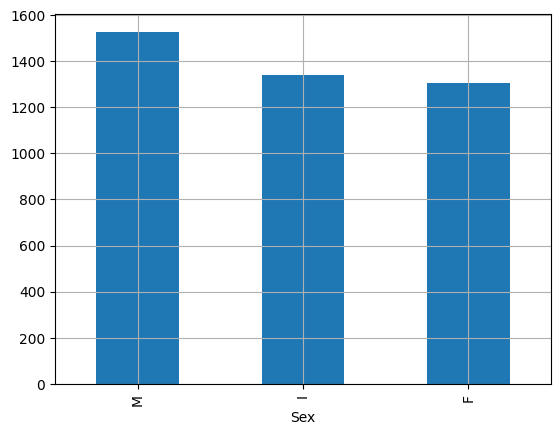

In [4]:
data.Sex.value_counts().plot(kind="bar", grid=True)


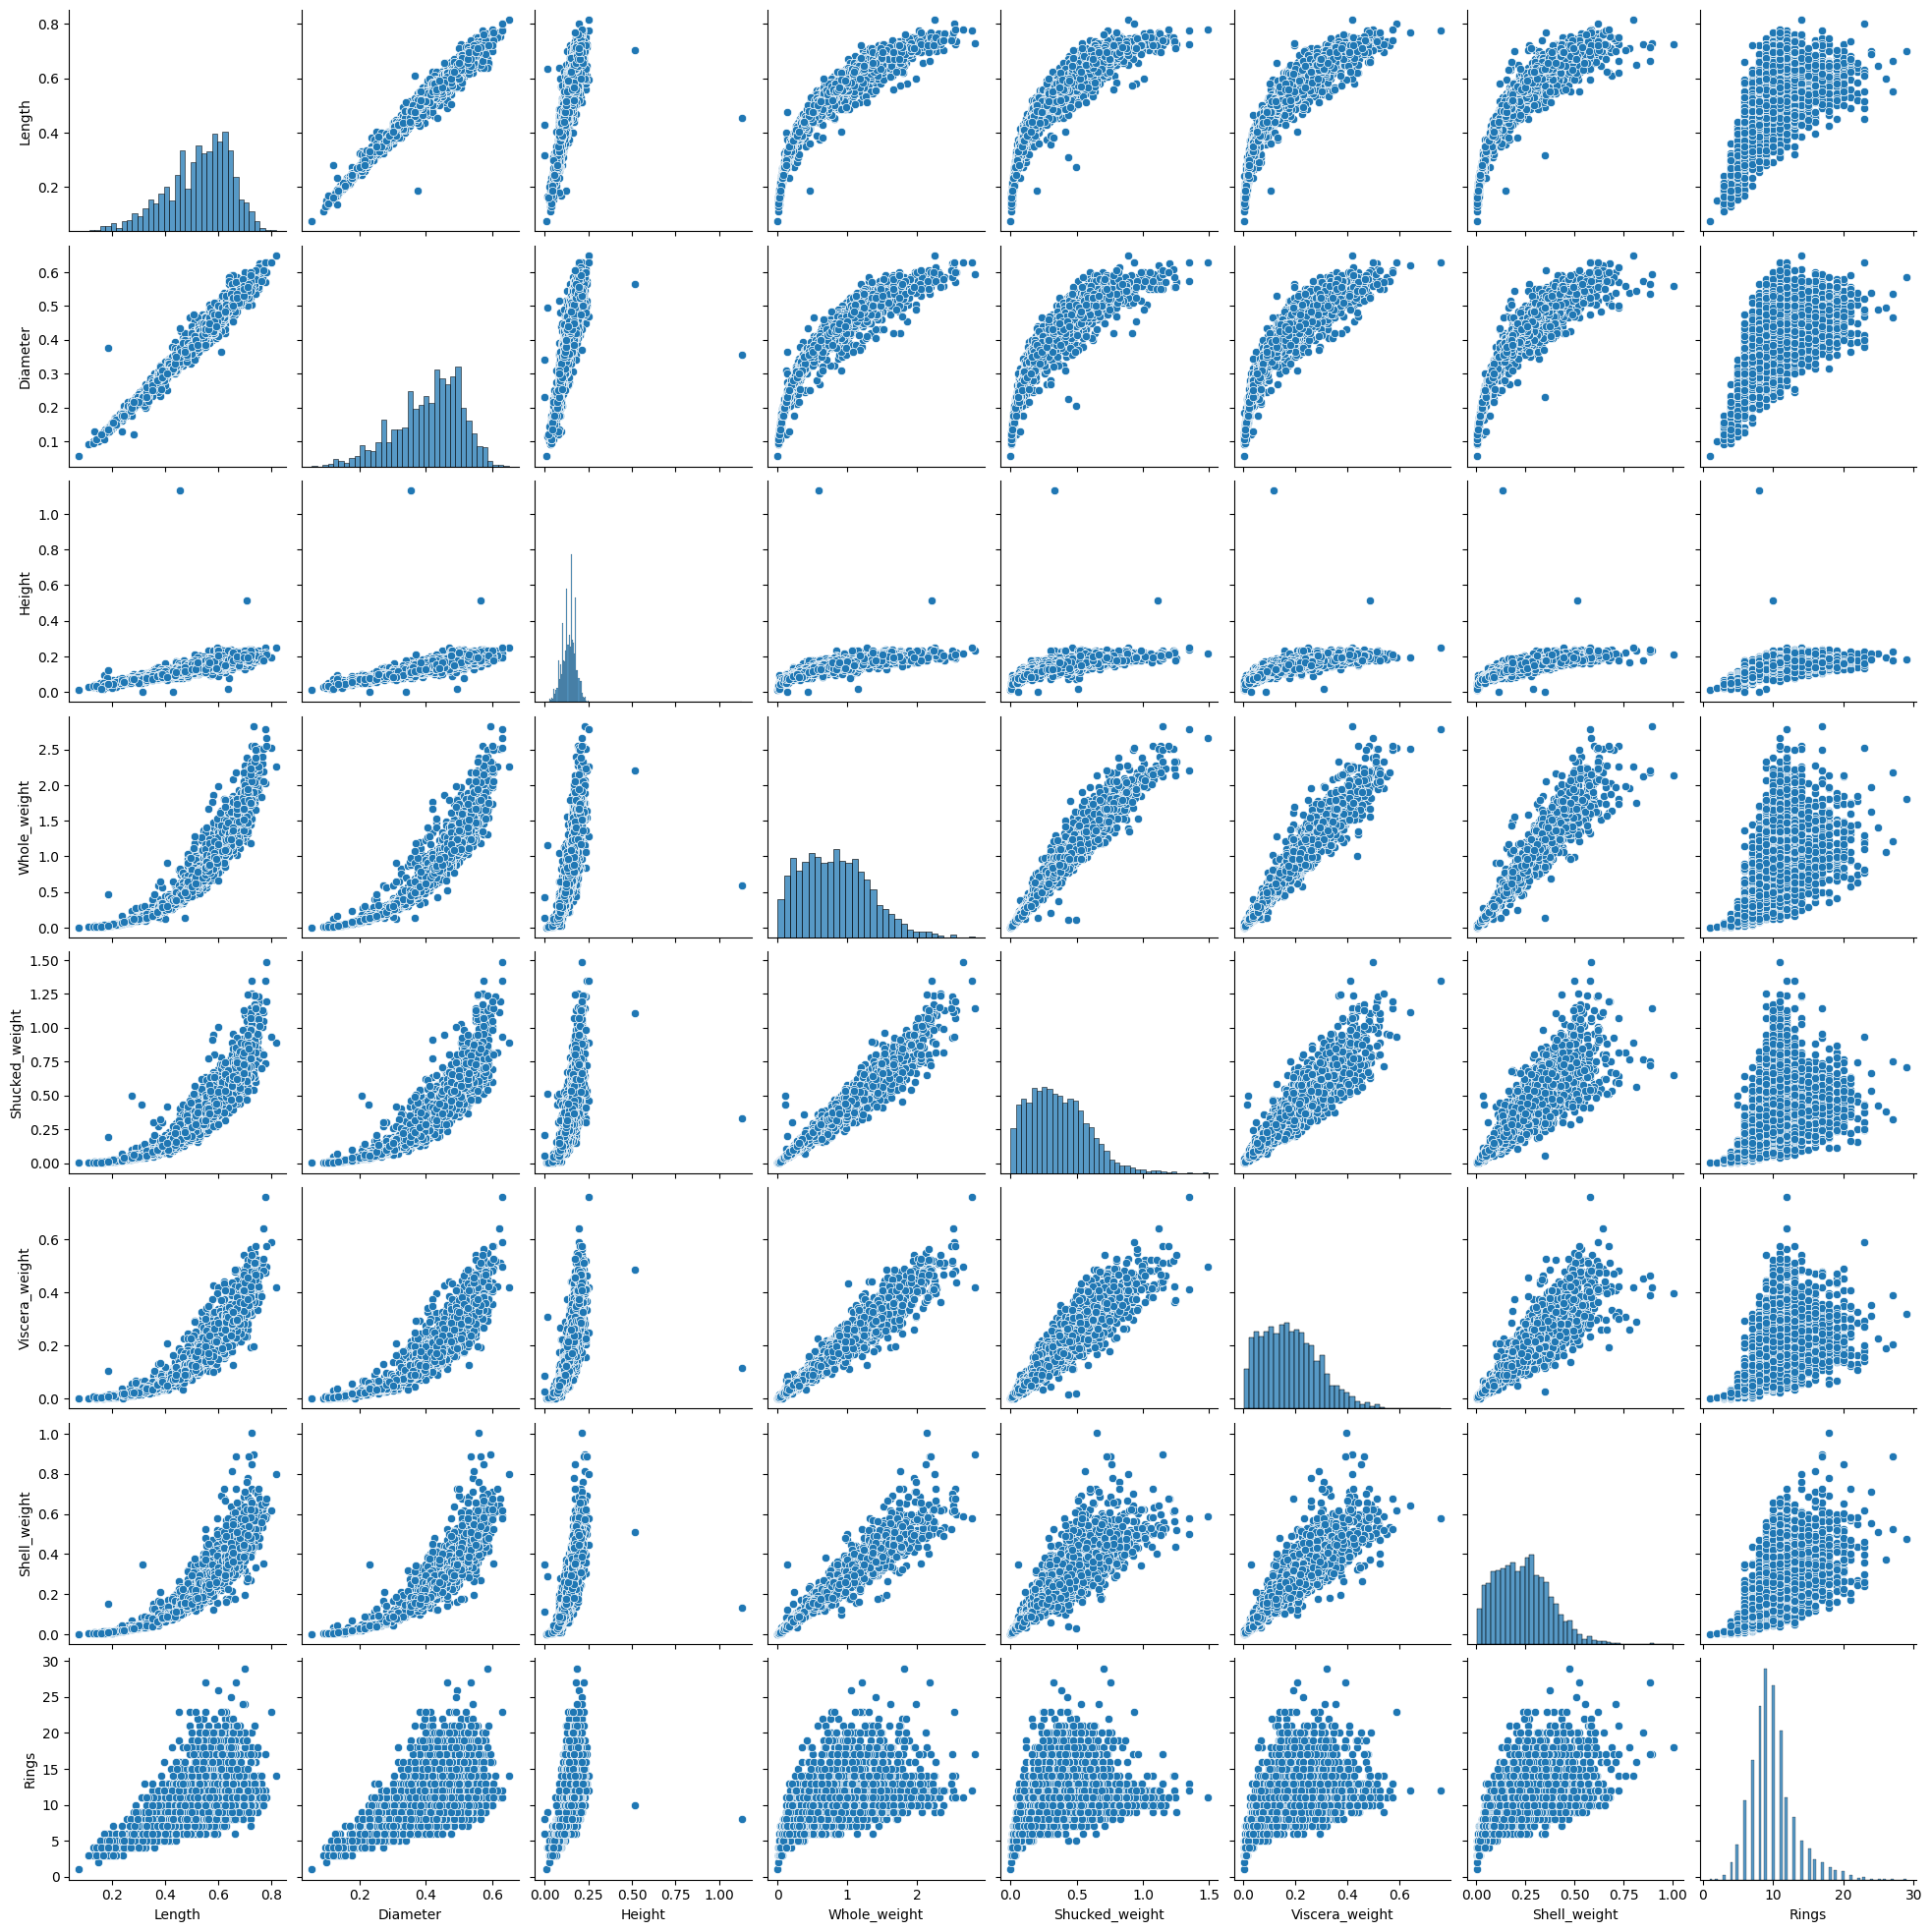

In [5]:
sns.pairplot(data)
plt.plot();

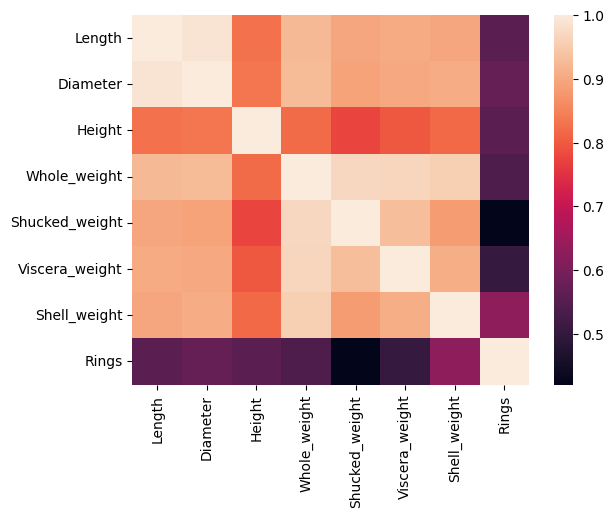

In [6]:
corr = data.drop(columns="Sex").corr()
sns.heatmap(corr)
plt.plot();

In [7]:
# seperating the features from the target variable:
X,y = data.iloc[:,1:].values, data.iloc[:,0]

In [8]:
# Using Label encoder to encode the dependent variable:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([2, 2, 0, ..., 2, 0, 2])

In [9]:
# Scaling the features between 0 and 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

a. Splitting the data set into 50% training and 50 % testing data set:

In [10]:
#  Splitting the data set into training and validation data set:
x_train, x_val, y_train, y_val = train_test_split(X, y , test_size=0.5, random_state=1)

In [11]:
# validating the shape of inputs:
x_train.shape


(2088, 8)

b. Making a poor DNN that has the potential to over fit the data:

In [12]:
# Buidling a sequestial DNN:
model = Sequential()
model.add(k.layers.Dense(50, activation="tanh",input_shape=(8,)))

model.add(k.layers.Dense(150, activation="relu"))
model.add(k.layers.Dense(300, activation="relu"))
model.add(k.layers.Dense(300, activation="relu"))
model.add(k.layers.Dense(150, activation="relu"))

# output layer:
model.add(k.layers.Dense(3, activation="softmax"))
# compiling the model:
model.compile(optimizer=Nadam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

- Using 100 epochs:

In [13]:
# training the model:
history = model.fit(x_train,y_train, validation_data=(x_val, y_val), epochs=100)


Epoch 1/100


66/66 [==============================] - 2s 7ms/step - loss: 0.9386 - accuracy: 0.4962 - val_loss: 0.9117 - val_accuracy: 0.5151
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8782 - accuracy: 0.5340 - val_loss: 0.8666 - val_accuracy: 0.5371
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8649 - accuracy: 0.5474 - val_loss: 0.8764 - val_accuracy: 0.5256
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8635 - accuracy: 0.5335 - val_loss: 0.8874 - val_accuracy: 0.5275
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8604 - accuracy: 0.5431 - val_loss: 0.8570 - val_accuracy: 0.5390
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8597 - accuracy: 0.5412 - val_loss: 0.8777 - val_accuracy: 0.5285
Epoch 7/100
66/66 [==============================] - 0s 4ms/step - loss: 0.8521 - accuracy: 0.5469 - val_loss: 0.8605 - val_accuracy: 0.5433
Epoch 8/100

- Gnerating a graph that depicts loss, val_loss, accuracy and val_accuracy:

In [14]:
# Extracting the data to plot:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

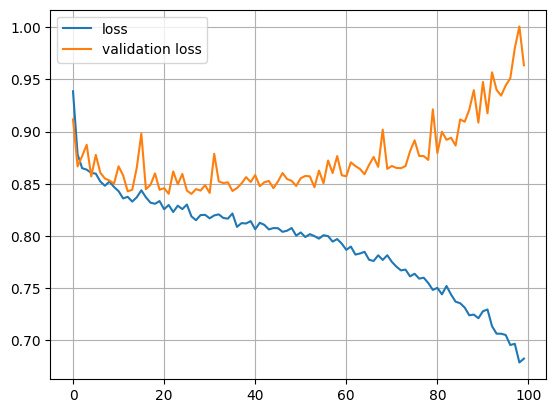

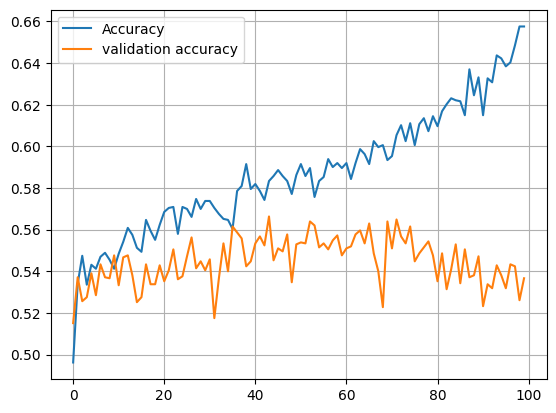

<Figure size 640x480 with 0 Axes>

In [ ]:
def metrics_graph(loss, val_loss, acc, val_acc):
    """ 
    Gnerates the plot for the accuracy and loss of training data and validation data.

    Args:
        loss (List): Training loss
        val_loss (List): Validation loss
        acc (List): Training accuracy
        val_acc (List): Validation accuracy

    Retunrs: 
        A plot.
    """
    plt.plot(loss, label="loss")
    plt.plot(val_loss, label = "validation loss")
    plt.legend()
    plt.grid()
    plt.show();
    plt.plot(acc, label="Accuracy")
    plt.plot(val_acc, label = "validation accuracy")
    plt.legend()
    plt.grid()
    plt.show();
    plt.savefig("abalone-b.png")


metrics_graph(loss=loss, val_loss=val_loss, acc=acc, val_acc=val_acc)

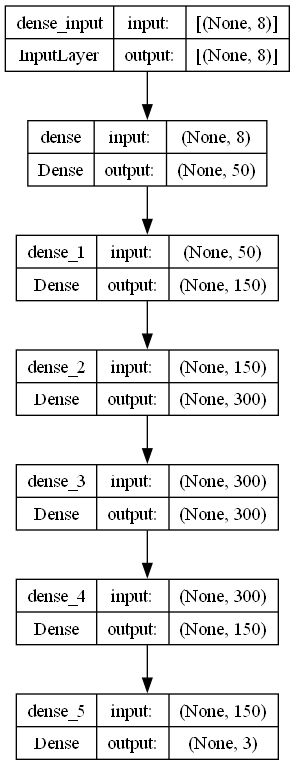

In [16]:
plot_model(model, to_file="overfitted_model.png", show_shapes=True, show_layer_names=True)

### Optimized Model:

In [19]:
from keras.regularizers import l1_l2
import keras_tuner as kt

In [ ]:
# defining the search space for hyper parameter tuning:
def optimized_model(hp):
    """ 
    Builds and returns a Keras Sequential model with tunable hyperparameters.

    The model consists of multiple dense layers with adjustable units, activation functions,
    kernel initializers, and L1/L2 regularization. It is optimized using RMSprop with a 
    tunable learning rate.

    Args:
    hp (keras_tuner.HyperParameters): Hyperparameter tuning object that allows dynamic 
                                        selection of model parameters.

    Returns:
        keras.models.Sequential: A compiled Keras model ready for training.

    Tunable Hyperparameters:
        - units_1, units_2: Number of units in each dense layer (32-256, step=32).
        - activation_1, activation_2: Activation functions ('relu' or 'tanh').
        - initializer_1, initializer_2: Kernel initializers ('glorot_uniform', 'he_normal').
        - l1_1, l1_2: L1 regularization strength (0.0 to 0.01, step=0.001).
        - l2_1, l2_2: L2 regularization strength (0.0 to 0.01, step=0.001).
        - learning_rate: Learning rate for RMSprop (1e-4 to 1e-2, logarithmic sampling).

    Notes:
        - The model ends with a softmax activation for multi-class classification.
        - The loss function used is sparse categorical crossentropy.
    """
    model = Sequential()

    model.add(k.layers.Dense(
        units = hp.Int("units_1", min_value=32, max_value=256, step=32),
        activation= hp.Choice("activation_1", values=["relu", "tanh"]),
        kernel_initializer=hp.Choice("initializer_1", values=["glorot_uniform", "he_normal"]),
        kernel_regularizer=l1_l2(l1=hp.Float("l1_1", 0.0, 0.01, step=0.001),
                                 l2=hp.Float("l2_1", 0.0, 0.01, step=0.001)),
    ))

        
    model.add(k.layers.Dense(
        units=hp.Int('units_2', min_value=32, max_value=256, step=32),
        activation=hp.Choice('activation_2', values=['relu', 'tanh']),
        kernel_initializer=hp.Choice('initializer_2', values=['glorot_uniform', 'he_normal']),
        kernel_regularizer=l1_l2(l1=hp.Float('l1_2', 0.0, 0.01, step=0.001), 
                                l2=hp.Float('l2_2', 0.0, 0.01, step=0.001))
    ))

    model.add(k.layers.Dense(
        units=hp.Int('units_2', min_value=32, max_value=256, step=32),
        activation=hp.Choice('activation_2', values=['relu', 'tanh']),
        kernel_initializer=hp.Choice('initializer_2', values=['glorot_uniform', 'he_normal']),
        kernel_regularizer=l1_l2(l1=hp.Float('l1_2', 0.0, 0.01, step=0.001), 
                                l2=hp.Float('l2_2', 0.0, 0.01, step=0.001))
    ))

    model.add(k.layers.Dense(
        units=hp.Int('units_2', min_value=32, max_value=256, step=32),
        activation=hp.Choice('activation_2', values=['relu', 'tanh']),
        kernel_initializer=hp.Choice('initializer_2', values=['glorot_uniform', 'he_normal']),
        kernel_regularizer=l1_l2(l1=hp.Float('l1_2', 0.0, 0.01, step=0.001), 
                                l2=hp.Float('l2_2', 0.0, 0.01, step=0.001))
    ))

    
    model.add(k.layers.Dense(3, activation='softmax'))

    model.compile(optimizer=RMSprop(learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="LOG")),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

In [ ]:
# Using keras tuner for random search:
tuner = kt.RandomSearch(
    optimized_model,
    objective="val_accuracy",
    max_trials=30,
    executions_per_trial=1,
)

In [ ]:
# Running the tuner:
tuner.search(X,y, validation_data = (x_val, y_val), epochs=100, batch_size=32)

Trial 30 Complete [00h 00m 51s]
val_accuracy: 0.3695548176765442

Best val_accuracy So Far: 0.5528961420059204
Total elapsed time: 00h 25m 03s


In [ ]:
# Getting the best hyperparameters:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

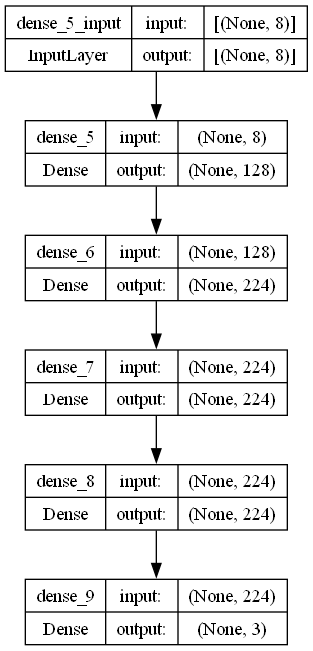

In [ ]:
# Plotting and saving the model architecture:
plot_model(best_model,to_file="optimized_model.png", show_shapes=True)

In [ ]:
# Training the best model:
history = best_model.fit(X,y, validation_data=(x_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
131/131 [==============================] - 2s 8ms/step - loss: 13.9805 - accuracy: 0.4656 - val_loss: 2.8128 - val_accuracy: 0.5194
Epoch 2/100
131/131 [==============================] - 1s 4ms/step - loss: 2.2118 - accuracy: 0.5236 - val_loss: 1.8644 - val_accuracy: 0.5184
Epoch 3/100
131/131 [==============================] - 1s 4ms/step - loss: 1.6703 - accuracy: 0.5320 - val_loss: 1.5395 - val_accuracy: 0.5290
Epoch 4/100
131/131 [==============================] - 1s 4ms/step - loss: 1.4907 - accuracy: 0.5367 - val_loss: 1.4657 - val_accuracy: 0.5309
Epoch 5/100
131/131 [==============================] - 0s 4ms/step - loss: 1.4440 - accuracy: 0.5269 - val_loss: 1.4394 - val_accuracy: 0.5294
Epoch 6/100
131/131 [==============================] - 0s 4ms/step - loss: 1.4220 - accuracy: 0.5356 - val_loss: 1.4145 - val_accuracy: 0.5347
Epoch 7/100
131/131 [==============================] - 0s 4ms/step - loss: 1.4152 - accuracy: 0.5403 - val_loss: 1.4087 - val_accuracy: 0.529

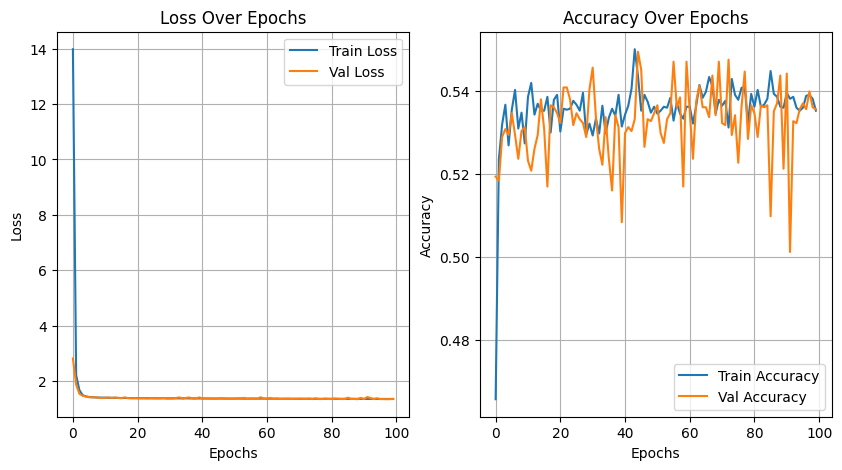

In [ ]:
# Plotting the evaluation plots for the training and valdiation data
plt.figure(figsize=(10, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Save plot
plt.savefig('abalone-c.png')
plt.grid()
plt.show()